In [1]:
## Importing Data

import os
from PIL import Image
import numpy as np

# Preprocessing settings
IMG_SIZE = (128, 128)  # Resize images and masks to 128x128

# Function to load and preprocess PNG images from a given directory
def load_and_preprocess_png_images(directory, is_mask=False):
    images = []

    # Ensure the directory exists
    if not os.path.exists(directory):
        raise FileNotFoundError(f"The directory {directory} does not exist.")
    
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Check if it's a .png file
        if filename.endswith(".png"):
            # Open and resize the image file
            img = Image.open(file_path).resize(IMG_SIZE)
            
            # Convert to grayscale if it's a mask
            if is_mask:
                img = img.convert('L')  # Convert mask to grayscale
                img_data = np.array(img) / 255.0  # Normalize and convert mask to binary
                img_data = np.round(img_data).astype(np.uint8)  # Binary mask (0 or 1)
            else:
                img = img.convert('RGB')  # Convert image to RGB
                img_data = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            
            images.append(img_data)
        else:
            print(f"Skipping {filename}: not a PNG file.")
    
    return np.array(images)  # Return as NumPy array

# Function to load and preprocess the entire dataset
def load_and_preprocess_dataset():
    # Define the directories for validation, train, and test data
    validation_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images"
    validation_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/masks"
    train_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images"
    train_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks"
    test_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/images"
    test_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/masks"
    
    # Load and preprocess the images and masks
    validation_images = load_and_preprocess_png_images(validation_img_dir, is_mask=False)
    validation_masks = load_and_preprocess_png_images(validation_mask_dir, is_mask=True)
    train_images = load_and_preprocess_png_images(train_img_dir, is_mask=False)
    train_masks = load_and_preprocess_png_images(train_mask_dir, is_mask=True)
    test_images = load_and_preprocess_png_images(test_img_dir, is_mask=False)
    test_masks = load_and_preprocess_png_images(test_mask_dir, is_mask=True)

    # Return the preprocessed datasets as a dictionary
    return {
        "validation_images": validation_images,
        "validation_masks": validation_masks,
        "train_images": train_images,
        "train_masks": train_masks,
        "test_images": test_images,
        "test_masks": test_masks
    }

# Load and preprocess the dataset
dataset = load_and_preprocess_dataset()

# Print summary of shapes
print(f"Validation Images Shape: {dataset['validation_images'].shape}")
print(f"Validation Masks Shape: {dataset['validation_masks'].shape}")
print(f"Train Images Shape: {dataset['train_images'].shape}")
print(f"Train Masks Shape: {dataset['train_masks'].shape}")
print(f"Test Images Shape: {dataset['test_images'].shape}")
print(f"Test Masks Shape: {dataset['test_masks'].shape}")


Validation Images Shape: (396, 128, 128, 3)
Validation Masks Shape: (396, 128, 128)
Train Images Shape: (1385, 128, 128, 3)
Train Masks Shape: (1385, 128, 128)
Test Images Shape: (199, 128, 128, 3)
Test Masks Shape: (199, 128, 128)


## Data Preprocessing and Augumentation

In [7]:
pip install numpy opencv-python tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your image directories
train_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images"
train_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks"
val_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images"
val_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/masks"
test_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/images"
test_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/masks"

# Set the desired image size
IMG_SIZE = (128, 128)

# Load and preprocess functions
def load_and_preprocess_image(img_path, target_size=IMG_SIZE):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32) / 255.0
    return img

def load_and_preprocess_mask(mask_path, target_size=IMG_SIZE):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, target_size)
    mask = mask.astype(np.float32) / 255.0
    return mask

# Load dataset function
def load_dataset(img_dir, mask_dir=None):
    images = []
    masks = []
    
    img_paths = sorted([os.path.join(img_dir, img) for img in os.listdir(img_dir) if img.endswith('.png')])
    
    mask_paths = []  # Initialize mask_paths as an empty list
    if mask_dir:
        mask_paths = sorted([os.path.join(mask_dir, mask) for mask in os.listdir(mask_dir) if mask.endswith('.png')])
    
    for img_path, mask_path in zip(img_paths, mask_paths):
        img = load_and_preprocess_image(img_path)
        images.append(img)
        
        if mask_path:
            mask = load_and_preprocess_mask(mask_path)
            masks.append(mask)
    
    return np.array(images), np.array(masks) if mask_dir else np.array(images)

# Load datasets
train_images, train_masks = load_dataset(train_img_dir, train_mask_dir)
val_images, val_masks = load_dataset(val_img_dir, val_mask_dir)
test_images = load_dataset(test_img_dir)

# Print dtype of the datasets
print(f"Train images dtype: {train_images.dtype}")
print(f"Train masks dtype: {train_masks.dtype}")

# After the preprocessing, check if they are in the desired format
if train_images.dtype != np.float32:
    train_images = train_images.astype(np.float32)

if train_masks.dtype != np.float32:
    train_masks = train_masks.astype(np.float32)

# Add a channel dimension if missing (for grayscale images)
train_images = np.expand_dims(train_images, axis=-1) if train_images.ndim == 3 else train_images
train_masks = np.expand_dims(train_masks, axis=-1) if train_masks.ndim == 3 else train_masks

# Define data augmentation parameters
data_gen_args = dict(rotation_range=30,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Apply data augmentation for training images
def augment_data(images, masks, batch_size=32):
    seed = 1
    image_gen = image_datagen.flow(images, batch_size=batch_size, seed=seed)
    mask_gen = mask_datagen.flow(masks, batch_size=batch_size, seed=seed)
    return zip(image_gen, mask_gen)

# Example of how to get augmented data
augmented_data = augment_data(train_images, train_masks)


Train images dtype: float32
Train masks dtype: float32


In [4]:
# Print shapes of datasets

print("Train images shape:", train_images.shape)
print("Train masks shape:", train_masks.shape)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)
print("Test images shape:", test_images.shape)

Train images shape: (1385, 128, 128, 3)
Train masks shape: (1385, 128, 128, 1)
Validation images shape: (396, 128, 128, 3)
Validation masks shape: (396, 128, 128)


AttributeError: 'tuple' object has no attribute 'shape'

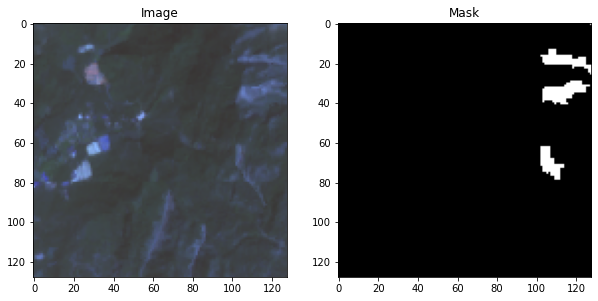

In [5]:
# Visualize Sample Images and Masks

import matplotlib.pyplot as plt

# Function to plot images and masks
def plot_sample_image_and_mask(image, mask):
    plt.figure(figsize=(10, 5))

    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")

    # Plot mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask[:, :, 0], cmap='gray')  # Use first channel for masks
    plt.title("Mask")
    plt.show()

# Show a random sample from the training set
plot_sample_image_and_mask(train_images[0], train_masks[0])

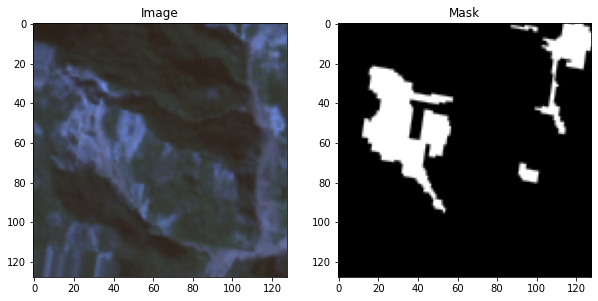

In [6]:
# Get a batch of augmented data
image_batch, mask_batch = next(augment_data(train_images, train_masks))

# Visualize augmented images and masks
plot_sample_image_and_mask(image_batch[0], mask_batch[0])

## U-NET MODEL

In [7]:
## U-Net model architecture
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras import backend as K
import tensorflow as tf


def unet_model(im_sz=128, n_channels=3, n_filters_start=32, growth_factor=2, upconv=True, class_weights=[0.3, 0.7]):
    droprate = 0.25
    n_filters = n_filters_start
    inputs = Input((im_sz, im_sz, n_channels))

    # Contracting Path
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = BatchNormalization()(pool1)

    n_filters *= growth_factor
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(droprate)(pool2)

    n_filters *= growth_factor
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(droprate)(pool3)

    # Bottleneck
    n_filters *= growth_factor
    conv4 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4)

    # Expansive Path
    n_filters //= growth_factor
    if upconv:
        up5 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv4), conv3])
    else:
        up5 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv3])
    up5 = BatchNormalization()(up5)
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Dropout(droprate)(conv5)

    n_filters //= growth_factor
    if upconv:
        up6 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv5), conv2])
    else:
        up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv2])
    up6 = BatchNormalization()(up6)
    conv6 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = Dropout(droprate)(conv6)

    n_filters //= growth_factor
    if upconv:
        up7 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6), conv1])
    else:
        up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv1])
    up7 = BatchNormalization()(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv7)

    # Output layer for binary segmentation
    conv8 = Conv2D(1, (1, 1), activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=conv8)

    # Weighted Binary Crossentropy
    def weighted_binary_crossentropy(y_true, y_pred):
        class_loglosses = K.mean(K.binary_crossentropy(y_true, y_pred), axis=[0, 1, 2])
        return K.sum(class_loglosses * K.constant(class_weights))

    model.compile(optimizer=Adam(), loss=weighted_binary_crossentropy, metrics=['accuracy'])

    return model

# Example usage
model = unet_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 128, 128, 32)      │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 64, 64, 32)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 64, 64, 32)        │             128 │ max_pooling2d[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 32, 32, 64)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 32, 32, 64)        │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 16, 16, 128)       │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 256)       │         295,168 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 256)       │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 32, 32, 128)       │         131,20

 Total params: 1,927,521 (7.35 MB)

 Trainable params: 1,926,561 (7.35 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
import os
import numpy as np
import cv2

def image_mask_generator(image_dir, mask_dir, batch_size, img_size=(128, 128)):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)

    while True:
        for i in range(0, len(image_files), batch_size):
            batch_image_files = image_files[i:i + batch_size]
            batch_mask_files = mask_files[i:i + batch_size]

            images = []
            masks = []

            for img_file, mask_file in zip(batch_image_files, batch_mask_files):
                img_path = os.path.join(image_dir, img_file)
                mask_path = os.path.join(mask_dir, mask_file)

                # Load and resize images and masks
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                image = cv2.resize(image, img_size)
                image = np.expand_dims(image, axis=-1)  # Add channel dimension for grayscale
                images.append(image)

                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
                mask = cv2.resize(mask, img_size)
                mask = np.expand_dims(mask, axis=-1)  # Add channel dimension for grayscale
                masks.append(mask)

            # Convert to numpy arrays and normalize
            images = np.array(images).astype('float32') / 255.0
            masks = np.array(masks).astype('float32') / 255.0

            yield images, masks


In [9]:
BATCH_SIZE = 16
train_generator = image_mask_generator(train_img_dir, train_mask_dir, BATCH_SIZE)

# Fetch one batch to inspect shapes
images, masks = next(train_generator)
print("Image batch shape:", images.shape)  # Expected: (batch_size, 128, 128, 1)
print("Mask batch shape:", masks.shape)    # Expected: (batch_size, 128, 128, 1)


Image batch shape: (16, 128, 128, 1)
Mask batch shape: (16, 128, 128, 1)


In [10]:
import cv2
import os

# Check if images can be accessed
for img_file in os.listdir(train_img_dir)[:5]:  # Check first 5 files
    img_path = os.path.join(train_img_dir, img_file)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            print(f"Successfully loaded image: {img_file} with shape: {img.shape}")
        else:
            print(f"Failed to load image: {img_file}")


Successfully loaded image: image_0.png with shape: (128, 128, 3)
Successfully loaded image: image_10.png with shape: (128, 128, 3)
Successfully loaded image: image_1001.png with shape: (128, 128, 3)
Successfully loaded image: image_1002.png with shape: (128, 128, 3)
Successfully loaded image: image_1003.png with shape: (128, 128, 3)


In [11]:
def load_images_and_masks(image_dir, mask_dir, img_size):
    images = []
    masks = []

    # Load images
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, img_size)
        images.append(img)

    # Load masks
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        mask = cv2.resize(mask, img_size)
        masks.append(mask)

    return np.array(images), np.array(masks)

train_images, train_masks = load_images_and_masks(train_img_dir, train_mask_dir, IMG_SIZE)
print("Train Images shape:", train_images.shape)
print("Train Masks shape:", train_masks.shape)


Train Images shape: (1385, 128, 128)
Train Masks shape: (1385, 128, 128)


In [35]:
import os
import numpy as np
import cv2

# Set paths to your image directories
train_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images"
train_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks"
val_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images"
val_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/masks"

# Set the desired image size (resize all images to this size)
IMG_SIZE = (256, 256)
MAX_SAMPLES = 200  # Set this to the desired number of samples

# Load images and masks with a limit on the number of samples
def load_images_and_masks(image_dir, mask_dir, img_size, max_samples):
    images = []
    masks = []
    
    # List all files in the directory and shuffle
    img_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)
    img_files.sort()  # Ensure matching order of images and masks
    mask_files.sort()
    
    # Limit the number of samples if needed
    img_files = img_files[:max_samples]
    mask_files = mask_files[:max_samples]

    # Load images and masks
    for img_file, mask_file in zip(img_files, mask_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)
        
        # Read and resize image in color mode
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)
        images.append(img)
        
        # Read and resize mask (still grayscale for segmentation)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, img_size)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load limited train and validation data
train_images, train_masks = load_images_and_masks(train_img_dir, train_mask_dir, IMG_SIZE, MAX_SAMPLES)
val_images, val_masks = load_images_and_masks(val_img_dir, val_mask_dir, IMG_SIZE, MAX_SAMPLES)

# Normalize data
train_images = train_images.astype('float32') / 255.0
train_masks = train_masks.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
val_masks = val_masks.astype('float32') / 255.0

# Reshape masks to have a single channel
train_masks = np.expand_dims(train_masks, axis=-1)
val_masks = np.expand_dims(val_masks, axis=-1)

# Check shapes to ensure proper loading
print("Train images shape:", train_images.shape)  # Should be (200, 256, 256, 3)
print("Train masks shape:", train_masks.shape)    # Should be (200, 256, 256, 1)
print("Validation images shape:", val_images.shape)
print("Validation masks shape:", val_masks.shape)


Train images shape: (200, 256, 256, 3)
Train masks shape: (200, 256, 256, 1)
Validation images shape: (200, 256, 256, 3)
Validation masks shape: (200, 256, 256, 1)


In [43]:
## Training the Unet model
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

# Set paths to your image directories
train_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images"
train_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks"
val_img_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images"
val_mask_dir = "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/masks"

# Set the desired image size (resize all images to this size)
IMG_SIZE = (256, 256)

# Load images and masks
def load_images_and_masks(image_dir, mask_dir, img_size):
    images = []
    masks = []
    
    # Load images
    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, img_size)
        images.append(img)

    # Load masks
    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        mask = cv2.resize(mask, img_size)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load train and validation data
train_images, train_masks = load_images_and_masks(train_img_dir, train_mask_dir, IMG_SIZE)
val_images, val_masks = load_images_and_masks(val_img_dir, val_mask_dir, IMG_SIZE)

# Normalize data
train_images = train_images.astype('float32') / 255.0
train_masks = train_masks.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
val_masks = val_masks.astype('float32') / 255.0

# Reshape masks to have a single channel
train_masks = np.expand_dims(train_masks, axis=-1)
val_masks = np.expand_dims(val_masks, axis=-1)

# Create the U-Net model
def unet_model(input_size=(256, 256, 1)):  # Change to (1) for single-channel input
    inputs = layers.Input(input_size)
    
    # Encoding path
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    
    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    
    # Decoding path
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv4])
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv3])
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = layers.concatenate([up8, conv2])
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = layers.concatenate([up9, conv1])
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)  # Output is single-channel
    
    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the U-Net model
unet = unet_model(input_size=(256, 256, 1))  # Update to (1) for single-channel input
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the loaded images and masks
history = unet.fit(
    train_images, 
    train_masks, 
    validation_data=(val_images, val_masks),
    epochs=25, #change epochs here
    batch_size=4  # Change to your preferred batch size
)

# Model summary
unet.summary()

Epoch 1/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 4028s 12s/step - accuracy: 0.9418 - loss: 0.3034 - val_accuracy: 0.9493 - val_loss: 0.1357
Epoch 2/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 3042s 9s/step - accuracy: 0.9425 - loss: 0.1362 - val_accuracy: 0.9493 - val_loss: 0.1746
Epoch 3/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 2999s 9s/step - accuracy: 0.9415 - loss: 0.1415 - val_accuracy: 0.9509 - val_loss: 0.1170
Epoch 4/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 2999s 9s/step - accuracy: 0.9437 - loss: 0.3104 - val_accuracy: 0.9493 - val_loss: 0.1529
Epoch 5/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 3075s 9s/step - accuracy: 0.9433 - loss: 0.1584 - val_accuracy: 0.9493 - val_loss: 0.1200
Epoch 6/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 3175s 9s/step - accuracy: 0.9420 - loss: 0.1520 - val_accuracy: 0.9493 - val_loss: 0.1659
Epoch 7/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 3114s 9s/step - accuracy: 0.9422 - loss: 0.1375 - val_accuracy: 0.9494 - val_loss: 0.1019
Epoch 8/25
347/347 ━━━━━━━━━━━━━━━━━━━━ 3119s 9s/step - accuracy: 0.9461 - loss: 0.1112 -

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 256, 256, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_121 (Conv2D)           │ (None, 256, 256, 64)      │             640 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_122 (Conv2D)           │ (None, 256, 256, 64)      │          36,928 │ conv2d_121[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_25              │ (None, 128, 128, 64)      │               0 │ conv2d_122[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_123 (Conv2D)           │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_25[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_124 (Conv2D)           │ (None, 128, 128, 128)     │         147,584 │ conv2d_123[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_26              │ (None, 64, 64, 128)       │               0 │ conv2d_124[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_125 (Conv2D)           │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_26[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_126 (Conv2D)           │ (None, 64, 64, 256)       │         590,080 │ conv2d_125[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_27              │ (None, 32, 32, 256)       │               0 │ conv2d_126[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_127 (Conv2D)           │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_27[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_128 (Conv2D)           │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_127[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_28              │ (None, 16, 16, 512)       │               0 │ conv2d_128[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_129 (Conv2D)           │ (None, 16, 16, 1024)      │       4,719,616 │ max_pooling2d_28[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_130 (Conv2D)           │ (None, 16, 16, 1024)      │       9,438,208 │ conv2d_129[0][0]           │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 93,091,781 (355.12 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,061,188 (236.74 MB)

In [44]:
unet.save('trained_unet_model.h5')  # Saves the model in HDF5 format

In [45]:
loaded_model = tf.keras.models.load_model('trained_unet_model.h5')

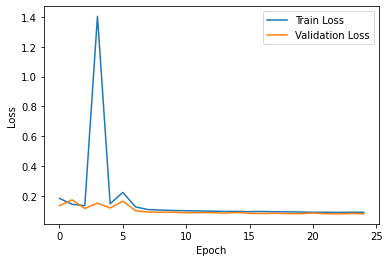

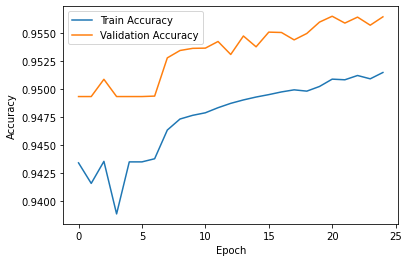

In [46]:
## Visualization of Accuracy and Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import load_model

# Assuming your U-Net model is already trained and saved as 'model'
# Also assuming you have validation/test data loaded as 'val_images' and 'val_masks'


In [48]:
# Ensure val_images has shape (batch_size, 128, 128)
print("Original val_images shape:", val_images.shape)

# Add a channel dimension to val_images
val_images = np.expand_dims(val_images, axis=-1)

# Now, val_images.shape should be (batch_size, 128, 128, 1)
print("Updated val_images shape:", val_images.shape)

Original val_images shape: (396, 256, 256)
Updated val_images shape: (396, 256, 256, 1)


In [51]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load your trained U-Net model
model = load_model('trained_unet_model.h5', compile=False)  # Adjust the path if necessary

# Assuming you have validation/test data loaded as 'val_images' and 'val_masks'
# Predict masks on the validation/test data
pred_masks = model.predict(val_images)
pred_masks = (pred_masks > 0.5).astype(np.float32)  # Threshold to get binary mask

# Flatten arrays for metric calculations
y_true = val_masks.flatten()
y_pred = pred_masks.flatten()

# Ensure y_true and y_pred are binary (0 or 1)
y_true = (y_true > 0.5).astype(np.uint8)
y_pred = (y_pred > 0.5).astype(np.uint8)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Calculate Dice score
def dice_score(y_true, y_pred):
    smooth = 1e-6  # Avoid division by zero
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

dice = dice_score(y_true, y_pred)

# Calculate IoU and mIoU
def iou_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + 1e-6) / (union + 1e-6)  # Adding a small smooth factor

iou = iou_score(y_true, y_pred)

# Calculate mIoU across all images
def mean_iou_score(y_true, y_pred):
    ious = []
    for i in range(len(y_true)):
        ious.append(iou_score(y_true[i], y_pred[i]))
    return np.mean(ious)

mIoU = mean_iou_score(val_masks, pred_masks)

# Print the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Dice Score: {dice:.4f}")
print(f"IoU Score: {iou:.4f}")
print(f"Mean IoU (mIoU): {mIoU:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 385s 29s/step
Accuracy: 0.9676
Precision: 0.7027
Recall: 0.3400
F1 Score: 0.4582
Dice Score: 0.4582
IoU Score: 0.2972
Mean IoU (mIoU): 0.2784


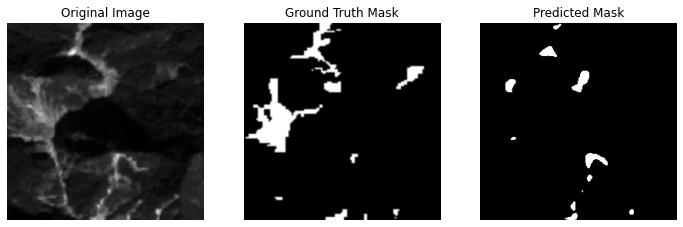

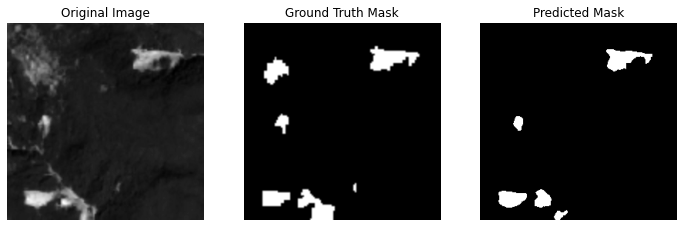

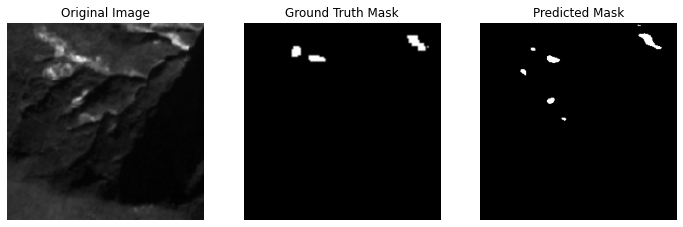

In [52]:
## Visualizing Predictions

import matplotlib.pyplot as plt

n = 3  # Number of images to visualize
for i in range(n):
    plt.figure(figsize=(12, 4))

    # Show original image
    plt.subplot(1, 3, 1)
    plt.imshow(val_images[i].squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show ground truth mask
    plt.subplot(1, 3, 2)
    plt.imshow(val_masks[i].squeeze(), cmap='gray')
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Show predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(pred_masks[i].squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

In [3]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install pytorch torchvision torchaudio -c pytorch

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [1]:
import torch
print(torch.__version__)


2.3.0


## DeepLabv3 MODEL

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from torch.cuda.amp import GradScaler, autocast

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Weight Initialization Function
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        elif isinstance(m, (nn.BatchNorm2d, nn.InstanceNorm2d)):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

# ASPP Module for DeepLabv3
class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels=256):
        super(ASPP, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0, dilation=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=6, dilation=6, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=12, dilation=12, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)
        self.conv4 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=18, dilation=18, bias=False)
        self.bn4 = nn.BatchNorm2d(out_channels)
        self.conv5 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)
        self.convf = nn.Conv2d(out_channels * 5, out_channels, kernel_size=1, stride=1, padding=0, dilation=1, bias=False)
        self.bnf = nn.BatchNorm2d(out_channels)
        self.adapool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        x1 = self.relu(self.bn1(self.conv1(x)))
        x2 = self.relu(self.bn2(self.conv2(x)))
        x3 = self.relu(self.bn3(self.conv3(x)))
        x4 = self.relu(self.bn4(self.conv4(x)))
        x5 = self.adapool(x)
        x5 = self.relu(self.conv5(x5))
        x5 = torch.nn.functional.interpolate(x5, size=x4.shape[-2:], mode='bilinear', align_corners=False)
        x = torch.cat((x1, x2, x3, x4, x5), dim=1)
        x = self.relu(self.bnf(self.convf(x)))
        return x

# DeepLabv3 Model
class DeepLabv3(nn.Module):
    def __init__(self, num_classes):
        super(DeepLabv3, self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.aspp = ASPP(in_channels=64, out_channels=256)
        self.classifier = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Conv2d(256, num_classes, kernel_size=1)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.aspp(x)
        x = self.classifier(x)
        x = nn.functional.interpolate(x, size=(256, 256), mode='bilinear', align_corners=False)
        return x

# Custom Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, mask_dir, transform=None, target_size=(256, 256)):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.target_size = target_size
        self.img_list = sorted(os.listdir(img_dir))
        self.mask_list = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_list[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_list[idx])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # Ensure masks are single-channel
        mask = mask.resize(self.target_size, Image.NEAREST)  # Resize mask

        if self.transform:
            image = self.transform(image)
            mask = transforms.ToTensor()(mask).squeeze(0).long()  # Convert mask to LongTensor
        return image, mask


def train(model, loader, criterion, optimizer, scaler):
    model.train()
    running_loss = 0.0
    for images, masks in tqdm(loader, desc="Training"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)
        optimizer.zero_grad()
        with autocast():
            outputs = model(images)
            loss = criterion(outputs, masks)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running_loss += loss.item()
    return running_loss / len(loader)

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Validation"):
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, masks)
            running_loss += loss.item()
    return running_loss / len(loader)

# Add Dice Loss Implementation
class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, outputs, targets):
        smooth = 1e-6
        outputs = torch.softmax(outputs, dim=1)  # Multi-class
        targets = torch.nn.functional.one_hot(targets, num_classes=outputs.shape[1]).permute(0, 3, 1, 2)
        intersection = (outputs * targets).sum(dim=(2, 3))
        union = outputs.sum(dim=(2, 3)) + targets.sum(dim=(2, 3))
        dice = (2.0 * intersection + smooth) / (union + smooth)
        return 1 - dice.mean()

def main():
    num_classes = 21  # Adjust based on dataset
    model = DeepLabv3(num_classes=num_classes).to(DEVICE)
    initialize_weights(model)  # Initialize model weights

    criterion_ce = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
    scaler = GradScaler()

    transform_train = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    transform_val_test = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = CustomDataset(
        img_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images",
        mask_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks",
        transform=transform_train
    )
    val_dataset = CustomDataset(
        img_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images",
        mask_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validationmasks",
        transform=transform_val_test
    )

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

    for epoch in range(5):
        print(f"\nEpoch {epoch+1}/5")
        train_loss = train(model, train_loader, criterion_ce, optimizer, scaler)
        val_loss = validate(model, val_loader, criterion_ce)

        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

if __name__ == "__main__":
    main()



Epoch 1/5


Validation: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [04:11<00:00,  5.02s/it]


Train Loss: 0.5842, Val Loss: 0.1122

Epoch 2/5


Validation: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [04:24<00:00,  5.30s/it]


Train Loss: 0.2026, Val Loss: 0.1084

Epoch 3/5


Validation: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [06:19<00:00,  7.59s/it]


Train Loss: 0.1958, Val Loss: 0.1004

Epoch 4/5


Validation: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [04:24<00:00,  5.29s/it]


Train Loss: 0.1824, Val Loss: 0.1096

Epoch 5/5


Validation: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [04:37<00:00,  5.54s/it]

Train Loss: 0.1686, Val Loss: 0.0942


In [26]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
from PIL import Image
import numpy as np


# Assuming your ASSP and DeepLabv3 definitions are here
# Define your DeepLabv3 class and ASSP class here

# Device configuration
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model globally
model = DeepLabv3(num_classes=21).to(DEVICE)

def main():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # Add your dataset, DataLoader, training, and validation code here
    # ... rest of your code remains the same ...

if __name__ == '__main__':
    main()
    # Define the model save path
    model_save_path = "C:/Users/91897/OneDrive/Desktop/DIP/trained_model.pth"
    # Save the trained model
    torch.save(model.state_dict(), model_save_path)
    print("Model saved successfully at:", model_save_path)


Model saved successfully at: C:/Users/91897/OneDrive/Desktop/DIP/trained_model.pth


In [27]:
# Assuming CustomDataset is already defined with __getitem__ that loads images and masks
from torch.utils.data import DataLoader
from torchvision import transforms

# Define transformations for test data
test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Load test dataset
test_dataset = CustomDataset(
    img_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/images", 
    mask_dir="C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/masks",
    transform=test_transforms
)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [29]:
import torch
import numpy as np

# Helper functions for segmentation metrics
def calculate_metrics(pred, target, num_classes):
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'iou': [],
        'dice_score': []
    }
    
    for class_id in range(num_classes):
        # Binary predictions for the current class
        pred_class = (pred == class_id).float()
        target_class = (target == class_id).float()
        
        # True Positives, False Positives, False Negatives, True Negatives
        TP = torch.sum(pred_class * target_class)
        FP = torch.sum(pred_class * (1 - target_class))
        FN = torch.sum((1 - pred_class) * target_class)
        TN = torch.sum((1 - pred_class) * (1 - target_class))
        
        # Accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-7)
        # Precision
        precision = TP / (TP + FP + 1e-7)
        # Recall
        recall = TP / (TP + FN + 1e-7)
        # Dice Similarity Score (F1)
        dice_score = 2 * precision * recall / (precision + recall + 1e-7)
        # Mean Intersection over Union (mIoU)
        iou = TP / (TP + FP + FN + 1e-7)
        
        # Append the results
        metrics['accuracy'].append(accuracy.item())
        metrics['precision'].append(precision.item())
        metrics['recall'].append(recall.item())
        metrics['f1_score'].append(dice_score.item())
        metrics['iou'].append(iou.item())
        metrics['dice_score'].append(dice_score.item())
    
    # Return mean values for all metrics
    return {k: np.mean(v) for k, v in metrics.items()}

# Evaluation function
def evaluate(model, test_loader, num_classes, device='cuda'):
    model.eval()
    all_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': [],
        'iou': [],
        'dice_score': []
    }
    
    with torch.no_grad():
        for images, masks in test_loader:
            # Move data to the specified device
            images, masks = images.to(device), masks.to(device)
            
            # Get model predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            
            # Compute metrics for the current batch
            batch_metrics = calculate_metrics(predictions, masks, num_classes)
            
            # Aggregate metrics
            for k, v in batch_metrics.items():
                all_metrics[k].append(v)
    
    # Average over all batches
    avg_metrics = {k: np.mean(v) for k, v in all_metrics.items()}
    
    print("Performance Metrics:")
    print(f"Accuracy: {avg_metrics['accuracy']:.4f}")
    print(f"Precision: {avg_metrics['precision']:.4f}")
    print(f"Recall: {avg_metrics['recall']:.4f}")
    print(f"F1 Score (Dice Score): {avg_metrics['f1_score']:.4f}")
    print(f"Mean IoU: {avg_metrics['iou']:.4f}")
    
    return avg_metrics

# Example usage:
# Define the number of classes and evaluate the model
num_classes = 21  # Update this to match your task
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
evaluate(model, test_loader, num_classes, DEVICE)


Performance Metrics:
Accuracy: 0.9048
Precision: 0.0000
Recall: 0.0000
F1 Score (Dice Score): 0.0000
Mean IoU: 0.0000


{'accuracy': 0.9047619047622375,
 'precision': 0.0,
 'recall': 0.0,
 'f1_score': 0.0,
 'iou': 0.0,
 'dice_score': 0.0}

Batch 1: Loaded 4 images
Batch 2: Loaded 4 images
Batch 3: Loaded 4 images
Batch 4: Loaded 4 images
Batch 5: Loaded 4 images


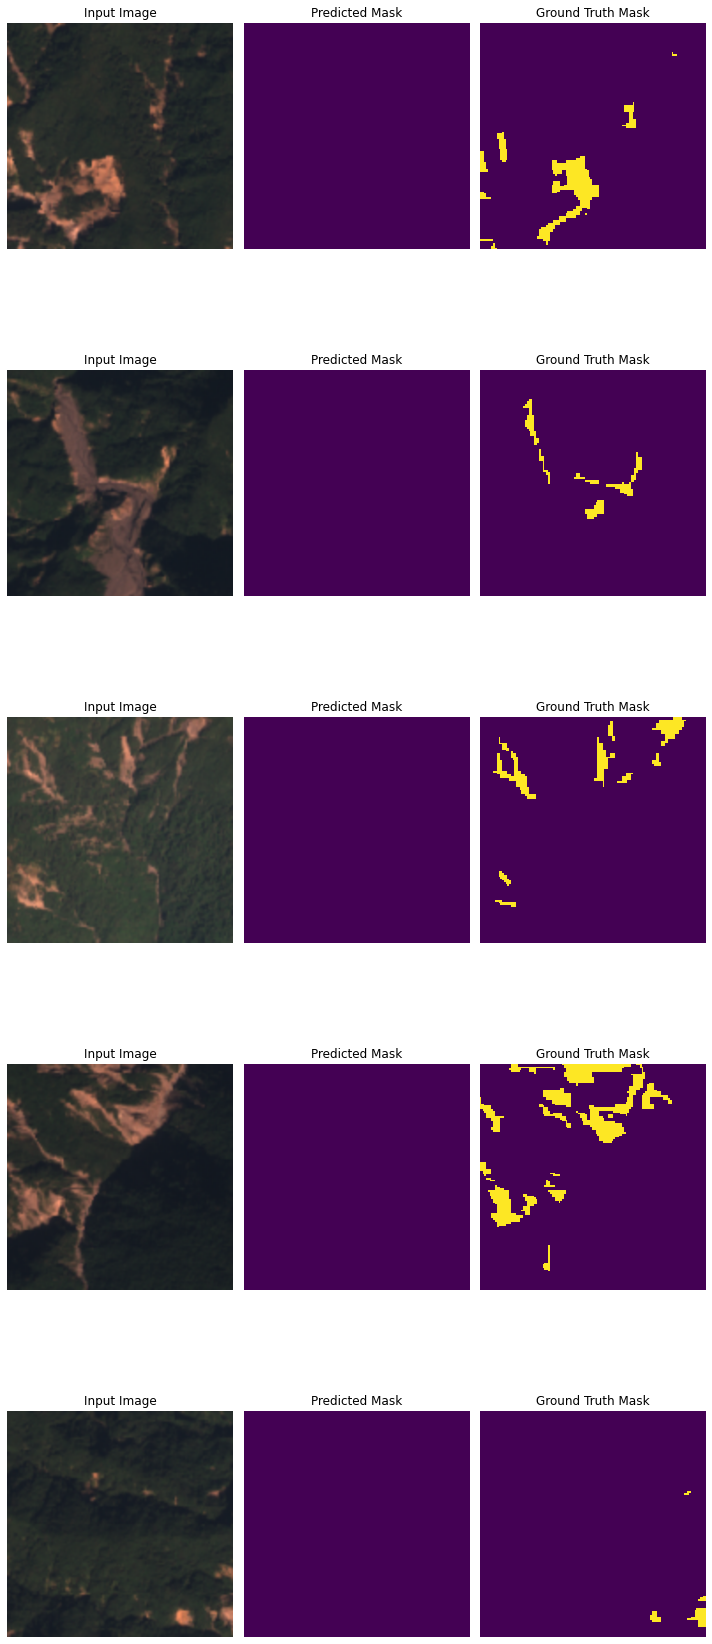

In [20]:
import matplotlib.pyplot as plt

# Function to visualize a batch of images with their predictions and ground truths
def visualize_predictions(model, test_loader, num_images=5):
    model.eval()
    fig, axs = plt.subplots(num_images, 3, figsize=(10, 5 * num_images))
    
    # Check if test_loader is empty
    if len(test_loader) == 0:
        print("Test loader is empty. Please check your data.")
        return

    with torch.no_grad():
        for i, (images, masks) in enumerate(test_loader):
            if i >= num_images:
                break
            
            # Move images and masks to the same device as the model
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            
            # Get predictions
            outputs = model(images)
            predictions = torch.argmax(outputs, dim=1)
            
            # Check if images and masks are loaded properly
            print(f"Batch {i + 1}: Loaded {images.size(0)} images")
            
            for j in range(images.shape[0]):
                # Convert tensors to numpy arrays for plotting
                img = images[j].cpu().numpy().transpose(1, 2, 0)
                pred_mask = predictions[j].cpu().numpy()
                true_mask = masks[j].cpu().numpy()
                
                # Plot input image
                axs[i, 0].imshow(img)
                axs[i, 0].set_title("Input Image")
                axs[i, 0].axis('off')
                
                # Plot predicted mask
                axs[i, 1].imshow(pred_mask, cmap="viridis", interpolation="nearest")
                axs[i, 1].set_title("Predicted Mask")
                axs[i, 1].axis('off')
                
                # Plot ground-truth mask
                axs[i, 2].imshow(true_mask, cmap="viridis", interpolation="nearest")
                axs[i, 2].set_title("Ground Truth Mask")
                axs[i, 2].axis('off')
                
                break  # Only show one sample per batch

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_predictions(model, test_loader)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

def FCN8(input_shape=(128, 128, 3), n_classes=2):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 4 - Upsampling
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(n_classes, (3, 3), strides=(2, 2), padding='same', activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Instantiate the model
model = FCN8(input_shape=(128, 128, 3), n_classes=2)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 128, 128, 2)         │           1,154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 740,802 (2.83 MB)

 Trainable params: 740,802 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model
import os

# Define the FCN8 model architecture with updated input shape
def FCN8(input_shape=(256, 256, 1), n_classes=2):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)

    # Block 4 - Upsampling
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(n_classes, (3, 3), strides=(2, 2), padding='same', activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Instantiate and compile the model with the updated shape
model = FCN8(input_shape=(256, 256, 1), n_classes=2)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Set paths and parameters
data_dir = "dataset"
train_img_path = os.path.join(data_dir, "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/images")
train_mask_path = os.path.join(data_dir, "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/train/masks")
img_size = (256, 256)
batch_size = 4
epochs = 25

# Function to load and preprocess images
def load_image(image_file):
    img = tf.io.read_file(image_file)
    img = tf.image.decode_png(img, channels=1)  # Load as grayscale
    img = tf.image.resize(img, img_size)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Function to load and preprocess masks
def load_mask(mask_file):
    mask = tf.io.read_file(mask_file)
    mask = tf.image.decode_png(mask, channels=1)  # Grayscale
    mask = tf.image.resize(mask, img_size)
    mask = mask / 255.0  # Normalize to [0, 1]
    return mask

# Load file paths for images and masks
train_img_files = sorted([os.path.join(train_img_path, fname) for fname in os.listdir(train_img_path) if fname.endswith('.png')])
train_mask_files = sorted([os.path.join(train_mask_path, fname) for fname in os.listdir(train_mask_path) if fname.endswith('.png')])

# Create a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_img_files, train_mask_files))

# Map the load functions onto the dataset
train_dataset = train_dataset.map(lambda img, mask: (load_image(img), load_mask(mask)), num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch the dataset for efficiency
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Train the model
history = model.fit(
    train_dataset,
    epochs=epochs,
    steps_per_epoch=len(train_img_files) // batch_size
)

# Print model summary
model.summary()


Epoch 1/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 293s 838ms/step - accuracy: 0.9375 - loss: 0.2166
Epoch 2/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.9258 - loss: 0.1082   
Epoch 3/25


C:\Users\91897\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


346/346 ━━━━━━━━━━━━━━━━━━━━ 330s 863ms/step - accuracy: 0.9438 - loss: 0.1189
Epoch 4/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.9413 - loss: 0.0890   
Epoch 5/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 279s 806ms/step - accuracy: 0.9461 - loss: 0.0980
Epoch 6/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.9414 - loss: 0.0900   
Epoch 7/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 281s 812ms/step - accuracy: 0.9466 - loss: 0.0937
Epoch 8/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.9418 - loss: 0.0859   
Epoch 9/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 299s 864ms/step - accuracy: 0.9469 - loss: 0.0914
Epoch 10/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.9430 - loss: 0.0818   
Epoch 11/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 294s 850ms/step - accuracy: 0.9470 - loss: 0.0901
Epoch 12/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9444 - loss: 0.0785   
Epoch 13/25
346/346 ━━━━━━━━━━━━━━━━━━━━ 295s 853ms/step - accuracy: 0.9475 - loss: 0.0883
Epoch 14/25
346/3

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 256, 256, 2)         │           1,154 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,218,952 (8.46 MB)

 Trainable params: 739,650 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,479,302 (5.64 MB)

In [3]:
# Set validation paths and parameters
val_img_path = os.path.join(data_dir, "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/images")
val_mask_path = os.path.join(data_dir, "C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/validation/masks")

# Load validation image and mask files
val_img_files = sorted([os.path.join(val_img_path, fname) for fname in os.listdir(val_img_path) if fname.endswith('.png')])
val_mask_files = sorted([os.path.join(val_mask_path, fname) for fname in os.listdir(val_mask_path) if fname.endswith('.png')])

# Create a tf.data.Dataset for validation
val_dataset = tf.data.Dataset.from_tensor_slices((val_img_files, val_mask_files))

# Map the load functions onto the dataset
val_dataset = val_dataset.map(lambda img, mask: (load_image(img), load_mask(mask)), num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch the dataset for efficiency
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_dataset)

# Print validation results
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9560 - loss: 0.0677
Validation Loss: 0.0722
Validation Accuracy: 0.9541


In [4]:
# Save the model in .h5 format
model.save("C:/Users/91897/OneDrive/Desktop/DIP/fcn_model.h5")

In [5]:
# Load the model in .h5 format
model = tf.keras.models.load_model("C:/Users/91897/OneDrive/Desktop/DIP/fcn_model.h5")

In [6]:
# Load the trained model from file
loaded_model = tf.keras.models.load_model('fcn8_trained_model.h5')

# You can now use the loaded model to predict or evaluate
loaded_model.evaluate(val_dataset)


99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9559 - loss: 0.0676


[0.07197032123804092, 0.9541006088256836]

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to preprocess test images to match the model input shape
def preprocess_image(image_file):
    img = tf.io.read_file(image_file)
    img = tf.image.decode_png(img, channels=1)  # Load as grayscale
    img = tf.image.resize(img, img_size)
    img = img / 255.0  # Normalize to [0, 1]
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to preprocess test masks to match the model input shape
def preprocess_mask(mask_file):
    mask = tf.io.read_file(mask_file)
    mask = tf.image.decode_png(mask, channels=1)  # Grayscale
    mask = tf.image.resize(mask, img_size)
    mask = tf.round(mask)  # Ensure mask values are either 0 or 1
    mask = tf.expand_dims(mask, axis=0)  # Add batch dimension
    return mask

# Function to calculate Intersection over Union (IoU)
def calculate_iou(y_true, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(np.int32)
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Evaluate the model on test images and masks
test_img_files = sorted([os.path.join("C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/images", fname) for fname in os.listdir("C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/images") if fname.endswith('.png')])
test_mask_files = sorted([os.path.join("C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/masks", fname) for fname in os.listdir("C:/Users/91897/OneDrive/Desktop/DIP/archive/dataset/test/masks") if fname.endswith('.png')])

ious = []
precisions = []
recalls = []

for img_file, mask_file in zip(test_img_files, test_mask_files):
    # Preprocess the image and mask
    img = preprocess_image(img_file)
    mask = preprocess_mask(mask_file)
    
    # Get prediction and convert to binary format for metrics calculation
    pred_mask = model.predict(img)
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    
    # Convert to numpy arrays for metric calculation
    y_true = mask.numpy().astype(np.int32).flatten()
    y_pred = pred_mask.numpy().astype(np.int32).flatten()
    
    # Calculate IoU
    iou = calculate_iou(y_true, y_pred)
    ious.append(iou)
    
    # Calculate Precision and Recall
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    true_positive = cm[1, 1]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]
    
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    
    precisions.append(precision)
    recalls.append(recall)

# Calculate average metrics across all test samples
mean_iou = np.mean(ious)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━